# LAB 7. Tree-Based Methods

In this assignment, we'll learn how to implement and tune tree-based models, including Random Forest, XGBoost and LightGBM. We'll also learn AUC - ROC curve which represents measure of separability and tells how much model is capable of distinguishing between classes.

XGBoost               | LightGBM
:------------------------:|:-------------------------:
![](https://github.com/microsoft/LightGBM/raw/master/docs/_static/images/level-wise.png) | ![](https://github.com/microsoft/LightGBM/raw/master/docs/_static/images/leaf-wise.png)


We'll again use [Titanic Kaggle Challenge](https://www.kaggle.com/c/titanic). Recall, description of the fields ([see in detail](https://www.kaggle.com/c/titanic/data)):
+ **survival** -- Survival: 0 = No, 1 = Yes
+ **pclass** -- Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
+ **sex** -- Sex
+ **Age** -- Age in years
+ **sibsp** -- # of siblings / spouses aboard the Titanic
+ **parch** -- # of parents / children aboard the Titanic
+ **ticket** -- Ticket number
+ **fare** -- Passenger fare
+ **cabin** -- Cabin number
+ **embarked** -- Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton


## Outline
Click on these links to jump to a particular section of this assignment.
- [1. Preprocessing](#1)
    - [1.1. Load data](#1-1)
    - [1.2. Check the data](#1-2)
    - [1.3. Transform the data](#1-3)
    - [1.4. Define training function (for all models in this assignment)](#1-4)
    - [1.5. Select features](#1-5)
- [2. Random Forest](#2)
    - [2.1. Random Forest Classifier](#2-1)
    - [2.2. Plot a single decision tree of the Random Forest](#2-2)
- [3. Gradient Boosting](#3)
    - [3.1. XGBoost](#3-1)
    - [3.2. Plot a single XGBoost decision tree](#3-2)
    - [3.3. LightGBM](#3-3)
    - [3.4. Plot a single LightGBM decision tree](#3-4)
- [4. AUC - ROC curve](#4)
- [5. YOUR TURN](#5) 
  

## Rreferences
- [Titanic: Machine Learning from Disaster (Kaggle Challenge)](https://www.kaggle.com/c/titanic)
- [Titanic: Machine Learning from Disaster – Kaggle Competition Solution using Python](http://blog.chapagain.com.np/titanic-machine-learning-from-disaster-kaggle-competition-solution-python/)
- [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Titanic Random Forest](https://www.kaggle.com/viczyf/titanic-random-forest-82-78)
- [How to Visualize a Decision Tree from a Random Forest in Python using Scikit-Learn](https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c)
- [Titanic survival prediction in Python with XGBoost](https://www.kaggle.com/ihopethiswillfi/titanic-survival-prediction-in-python-with-xgboost)
- [XGBoost](https://xgboost.readthedocs.io/en/latest/)
- [XGBoost Scikit-Learn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)
- [GitHub - dmlc/xgboost](https://github.com/dmlc/xgboost)
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/)
- [GitHub - microsoft/LightGBM](https://github.com/microsoft/LightGBM)
- [GitHub - microsoft/LightGBM/Features](https://github.com/microsoft/LightGBM/blob/master/docs/Features.rst)
- [Gradient Boosting, Decision Trees and XGBoost with CUDA](https://devblogs.nvidia.com/gradient-boosting-decision-trees-xgboost-cuda/)
- [Graphviz - Graph Visualization Software](https://graphviz.gitlab.io/)
- [How to Visualize Gradient Boosting Decision Trees With XGBoost in Python](https://machinelearningmastery.com/visualize-gradient-boosting-decision-trees-xgboost-python/)
- [Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
- [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
- [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

<a name="1"></a>
## 1. Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
ls

71.csv  diabetes.csv                 r_submission.csv        X_submission.csv
72.csv  house_prices_train_data.csv  submission.csv          д_submission.csv
73.csv  l_submission.csv             titanic_test_data.csv   ч_submission.csv
74.csv  rf_submission.csv            titanic_train_data.csv


<a name="1-1"></a>
### 1.1. Load data

In [ ]:
# Load useful libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train = pd.read_csv('titanic_train_data.csv')
test = pd.read_csv('titanic_test_data.csv')

dataset = [train, test]

print("Shape of the train dataframe =", train.shape)
print("Shape of the test dataframe =", test.shape)

train.head()

Shape of the train dataframe = (891, 12)
Shape of the test dataframe = (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<a name="1-2"></a>
### 1.2. Check the data

In [ ]:
# Check missing values in train data
print(f"Missing values in the training set:\n{train.isnull().sum()}\n")
print(f"Missing values in the test set:\n{test.isnull().sum()}")

Missing values in the training set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in the test set:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<a name="1-3"></a>
### 1.3. Transform the data

Notice the new `Title` feature.

In [ ]:
for data in dataset:
    # Fill missing values of Age and Fare with median values
    data['Age'] = data['Age'].fillna(value=data['Age'].median())
    data['Fare'] = data['Fare'].fillna(value=data['Fare'].median())
    data["Embarked"] = data["Embarked"].fillna(value="S")   # because "S" is the most common port of embarkation    
      
    # Create a new feature
    data["FamilySize"] = data["Parch"] + data["SibSp"]  
    
    # Create a `Title` feature
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')
    data['Title'] = data['Title'].replace(['Ms', 'Mlle'], 'Miss')
    data['Title'] = data['Title'].replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')
    data['Title'] = data['Title'].replace(['Dr', 'Major', 'Col', 'Sir'], 'Mr')
    data['Title'] = data['Title'].replace(['Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr')

    # Replace string values with numbers
    data["Sex"] = data["Sex"].map({"male": 1, "female": 0}).astype(int)    
    data["Embarked"] = data["Embarked"].map({"S": 1, "C": 2, "Q": 3}).astype(int)    
    data['Title'] = data['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3}).astype(int)        

    
# Check missing Age and Fare values
print("Check missing values:")
print("  Train: Age - {}, Fare - {}".format(train.Age.isnull().sum(), train.Fare.isnull().sum()))
print("  Test : Age - {}, Fare - {}".format(test.Age.isnull().sum(), test.Fare.isnull().sum()))

train.head()

Check missing values:
  Train: Age - 0, Fare - 0
  Test : Age - 0, Fare - 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,0,0


<a name="1-4"></a>
### 1.4. Define tree training function (for all models in this assignment)

Notice that `model.feature_importances_` returns the importance of the features of the `model` (the higher, the more important the feature).

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import accuracy_score


def train_tree_model(X, y, model, params):
    """
    Train a tree-based model.

    Args:
        X (pd.DataFrame): input feature examples, size (n_examples, n_features)
        y (pd.Series): labels, size (n_examples,)
        model (sklearn, xgboost or lightgbm): a tree-based model        
        params (dict): GridSearchCV's parameters
    Returns:
        model (sklearn, xgboost or lightgbm): a trained tree-based model
    """    
    
    # Split the data
    X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
       
    # Display the current grid of parameters
    print("PARAMETER GRID:")
    print(f"(number of grid elements: {len(ParameterGrid(params))})")
    print(*list(ParameterGrid(params))[:10], sep="\n")
    print("...........................................\n")

    # Set a GridSearch model
    grid_model = GridSearchCV(model, params, cv=5)

    # Train the GridSearch model
    grid_model.fit(X_train, y_train)

    # Display the best estimator, score and parameters
    print("BEST ESTIMATOR:")
    print(f"{grid_model.best_estimator_}\n")
    print(f"Mean cross-validated score of the best estimator: {grid_model.best_score_:.3f}\n")
    print(f"Best parameters: {grid_model.best_params_}\n")

    # Get the best classifier
    model = grid_model.best_estimator_        
     
    # Obtain and display test error
    y_dev_pred = model.predict(X_dev)
    print(f"Dev accuracy: {accuracy_score(y_dev, y_dev_pred):.3f}\n")
     
    # Display feature importance
    print("FEATURE IMPORTANCE:")
    feature_names = list(X)
    feature_importances = model.feature_importances_

    # Transform LightGBM's number of times the feature is used in a model into a weighting factor
    if max(feature_importances) > 1:
        feature_importances = feature_importances / sum(feature_importances)
    
    for name, value in sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True):
        print(f"{name}: {value:.3f}")
    print()

    # Plot feature importance
    fig = plt.figure(figsize=(10,4))
    plt.bar(range(len(feature_importances)), feature_importances, tick_label=feature_names)
    plt.show()    
    
    return model


<a name="1-5"></a>
### 1.5. Select features

Initially, let's try all the appropriate features, and then analyze their importance for our gradient boosting models.

In [ ]:
# Select features
selected_features = ["Sex", "Pclass", "SibSp", "Parch", "FamilySize", "Title", "Age", "Fare", "Embarked"]
X = train[selected_features]
y = train["Survived"]

<a name="2"></a>
## 2. Random Forest

<a name="2-1"></a>
### 2.1. Random Forest Classifier

Please review [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and install:

+ [Graphviz package](https://graphviz.gitlab.io/_pages/Download/Download_windows.html), and add the path of the Graphviz's `bin` folder (e.g., `C:\Program Files (x86)\Graphviz2.38\bin`) to the `PATH` environment variable

+ `python-graphviz` library for Anaconda using `conda install python-graphviz` in Anaconda Prompt

Some important parameters:

+ **n_estimators** (default=10). The number of trees in the forest.
+ **criterion** (default=”gini”). The function to measure the quality of a split. Supported criteria are `“gini”` for the Gini impurity and `“entropy”` for the information gain.
+ **max_depth** (default=None). The maximum depth of the tree. If `None`, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
+ **min_samples_split** (default=2). The minimum number of samples required to split an internal node:
    + If int, then consider `min_samples_split` as the minimum number.
    + If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split.
+ **min_samples_leaf** (default=1). The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least `min_samples_leaf` training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
    + If int, then consider `min_samples_leaf` as the minimum number.
    + If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node.
+ **max_features** (default=”auto”). The number of features to consider when looking for the best split:
    + If `int`, then consider `max_features` features at each split.
    + If `float`, then `max_features` is a fraction and `int(max_features * n_features)` features are considered at each split.
    + If `“auto”`, then `max_features=sqrt(n_features)`.
    + If `“sqrt”`, then `max_features=sqrt(n_features)` (same as `“auto”`).
    + If `“log2”`, then `max_features=log2(n_features)`.
    + If `None`, then `max_features=n_features`.
+ **oob_score** (default=False). Whether to use out-of-bag samples to estimate the generalization accuracy.
+ **random_state** (default=None):
    + If `int`, random_state is the seed used by the random number generator.
    + If `RandomState` instance, random_state is the random number generator.
    + If `None`, the random number generator is the `RandomState` instance used by `np.random`.

PARAMETER GRID:
(number of grid elements: 80)
{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}
{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 50}
{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}
{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 50}
{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 100}
{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 50}
{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100}
.........................

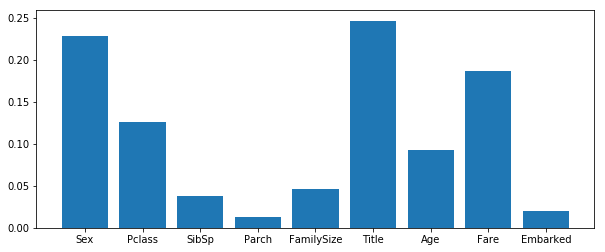

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a model
rf_model = RandomForestClassifier(criterion='gini', oob_score=True, random_state=1)

# Set a parameters grid for a GridSearchCV
params = {'n_estimators': [50, 100],
          'min_samples_split': [2, 4, 8, 16, 20],
          'min_samples_leaf': [1, 5, 10, 15],
          'max_features': ['auto', 4]}

# Train the model
rf_model = train_tree_model(X, y, rf_model, params)

<a name="2-2"></a>
### 2.2. Plot a single decision tree of the Random Forest

Please review [sklearn.tree.export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html).

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

# Export the 5th tree as dot file
export_graphviz(rf_model.estimators_[4], out_file='tree.dot', 
                feature_names = selected_features, class_names = ['Died', 'Survivied'],
                rounded = True, proportion = True, precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=300'])

# Display in jupyter notebook
Image(filename = 'tree.png')

<a name="3"></a>
## 3. Gradient Boosting

<a name="3-1"></a>
### 3.1. XGBoost

Please review [XGBoost](https://xgboost.readthedocs.io/en/latest/), and install `xgboost` library.

Some important parameters (in the [XGBoost Scikit-Learn API ](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) notation):
+ **n_estimators** (default=100). This is a number of trees to fit.
+ **learning_rate** (default=0.1). This is a boosting learning rate (xgb’s “eta”).
+ **max_depth** (default=3). Maximum tree depth for base learners.
+ **booster** (default=gbtree). Which booster to use. Can be `gbtree`, `gblinear` or `dart`; `gbtree` and `dart` use tree based models while `gblinear` uses linear functions.

PARAMETER GRID:
(number of grid elements: 80)
{'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 50}
{'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 100}
{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 50}
{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100}
{'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 50}
{'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 100}
{'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 50}
{'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 100}
{'learning_rate': 0.02, 'max_depth': 7, 'n_estimators': 50}
{'learning_rate': 0.02, 'max_depth': 7, 'n_estimators': 100}
...........................................

BEST ESTIMATOR:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              m

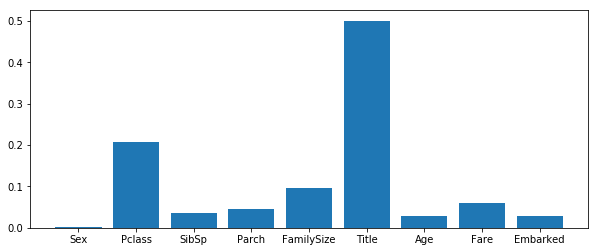

In [ ]:
import xgboost as xgb

# Instantiate a model
xgb_model = xgb.XGBClassifier()

# Set a parameters grid for a GridSearchCV
params = {'n_estimators': [50, 100],
          'learning_rate': np.linspace(0.02, 0.16, 8),
          'max_depth': range(3, 8)}

# Train the model
xgb_model = train_tree_model(X, y, xgb_model, params);

<a name="3-2"></a>
### 3.2. Plot a single XGBoost decision tree

Running the code creates a plot of the first decision tree in the model (index 0), showing the features and feature values for each split as well as the output leaf nodes. The **plot_tree()** function takes some parameters. You can plot specific graphs by specifying their index to the `num_trees` argument. For example, you can plot the 5th boosted tree in the sequence as follows:

```python
plot_tree(model, num_trees=4)
```

You can also change the layout of the graph to be left to right (easier to read) by changing the `rankdir` argument as `‘LR’` (left-to-right) rather than the default top to bottom (UT). For example:

```python
plot_tree(model, num_trees=0, rankdir='LR')
```

For more information, please review [xgboost.plot_tree](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.plot_tree).

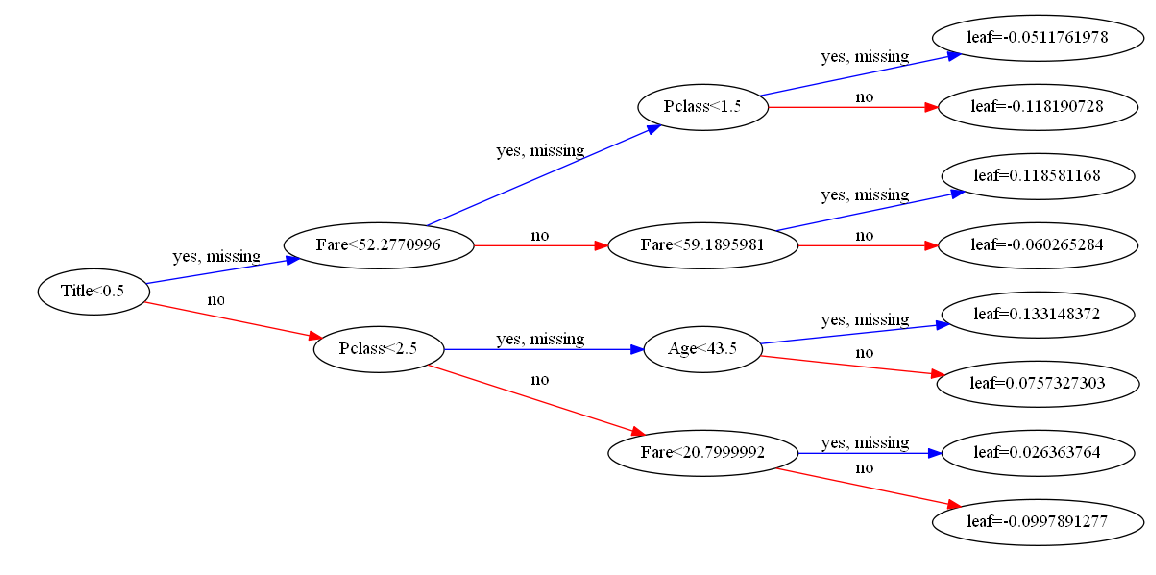

In [ ]:
# Plot 5th decision tree of the XGBoost model
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_tree(xgb_model, num_trees=4, rankdir='LR', ax=ax);

<a name="3-3"></a>
### 3.3. LightGBM

Please review [LightGBM](https://lightgbm.readthedocs.io/en/latest/) and [GitHub - microsoft/LightGBM/Features](https://github.com/microsoft/LightGBM/blob/master/docs/Features.rst), and do not forget to install `lightgbm` library.

Recall, **LightGBM** uses the [leaf-wise](https://github.com/microsoft/LightGBM/blob/master/docs/Features.rst#leaf-wise-best-first-tree-growth) tree growth algorithm, while **XGBoost** and **CatBoost** use depth-wise tree growth. Compared with depth-wise growth, the leaf-wise algorithm can converge much faster. However, the leaf-wise growth may be over-fitting if not used with the appropriate parameters.

To get good results using a leaf-wise tree, these are some important parameters:

+ **n_estimators** (or **num_iterations**; default = 100). This is a number of boosting iterations. Note: internally, LightGBM constructs `num_class * num_iterations` trees for multi-class classification problems.
+ **learning_rate** (default = 0.1). This is a shrinkage rate.
+ **num_leaves** (default = 31). This is the main parameter to control the complexity of the tree model. Theoretically, we can set $num\_leaves = 2^{max\_depth}$ to obtain the same number of leaves as depth-wise tree. However, this simple conversion is not good in practice. The reason is that a leaf-wise tree is typically much deeper than a depth-wise tree for a fixed number of leaves. Unconstrained depth can induce over-fitting. Thus, when trying to tune the num_leaves, we should let it be smaller than $2^{max\_depth}$. For example, when the `max_depth=7` the depth-wise tree can get good accuracy, but setting `num_leaves` to 127 may cause over-fitting, and setting it to 70 or 80 may get better accuracy than depth-wise.
+ **min_data_in_leaf** (default = 20). This is a very important parameter to prevent over-fitting in a leaf-wise tree. Its optimal value depends on the number of training samples and `num_leaves`. Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.
+ **max_depth** (default = -1; <= 0 means no limit). You also can use `max_depth` to limit the tree depth explicitly.

PARAMETER GRID:
(number of grid elements: 80)
{'learning_rate': 0.02, 'max_depth': 3, 'min_data_in_leaf': 20, 'n_estimators': 50, 'num_leaves': 31}
{'learning_rate': 0.02, 'max_depth': 3, 'min_data_in_leaf': 20, 'n_estimators': 100, 'num_leaves': 31}
{'learning_rate': 0.02, 'max_depth': 3, 'min_data_in_leaf': 30, 'n_estimators': 50, 'num_leaves': 31}
{'learning_rate': 0.02, 'max_depth': 3, 'min_data_in_leaf': 30, 'n_estimators': 100, 'num_leaves': 31}
{'learning_rate': 0.02, 'max_depth': 4, 'min_data_in_leaf': 20, 'n_estimators': 50, 'num_leaves': 31}
{'learning_rate': 0.02, 'max_depth': 4, 'min_data_in_leaf': 20, 'n_estimators': 100, 'num_leaves': 31}
{'learning_rate': 0.02, 'max_depth': 4, 'min_data_in_leaf': 30, 'n_estimators': 50, 'num_leaves': 31}
{'learning_rate': 0.02, 'max_depth': 4, 'min_data_in_leaf': 30, 'n_estimators': 100, 'num_leaves': 31}
{'learning_rate': 0.02, 'max_depth': 5, 'min_data_in_leaf': 20, 'n_estimators': 50, 'num_leaves': 31}
{'learning_rate': 0.02, 'max_dep

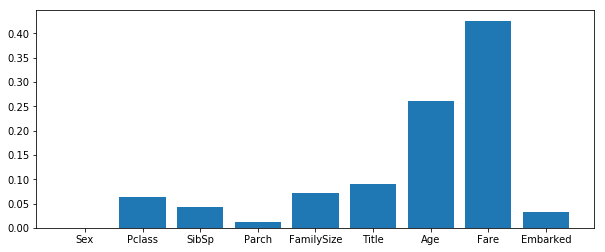

In [ ]:
import lightgbm as lgb

# Instantiate a model
lgbm_model = lgb.LGBMClassifier()

# Set a parameters grid for a GridSearchCV
params = {'n_estimators': [50, 100],
          'learning_rate': np.linspace(0.02, 0.16, 4),
          'num_leaves': [31],
          'min_data_in_leaf': [20, 30],
          'max_depth': range(3, 8)}

# Train the model
lgbm_model = train_tree_model(X, y, lgbm_model, params)

<a name="3-4"></a>
### 3.4. Plot a single LightGBM decision tree

Please review [lightgbm.plot_tree](https://lightgbm.readthedocs.io/en/latest/Python-API.html#lightgbm.plot_tree).

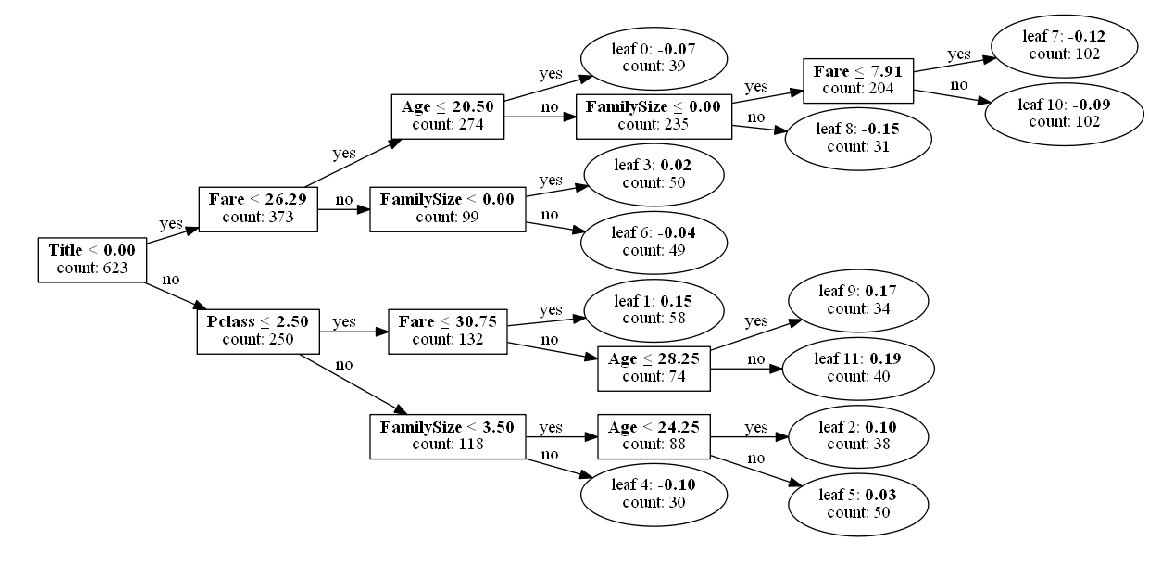

In [ ]:
# Plot 5th decision tree of the LightGBM model
ax = lgb.plot_tree(lgbm_model, tree_index=4, figsize=(20, 10), precision=2, show_info=['internal_count', 'leaf_count'])
plt.show()

<a name="4"></a>
## 4. AUC - ROC curve

**Receiver operating characteristic curve**, or [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic), is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the **true positive rate (TPR)** against the **false positive rate (FPR)** at various threshold settings.

![](https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png)

In binary classification, the class prediction for each instance is often made based on a continuous random variable $X$, which is a "score" computed for the instance (e.g. the estimated probability in logistic regression). Given a threshold parameter $T$, the instance is classified as "positive" if $X>T$, and "negative" otherwise. $X$ follows a probability density $f_{1}(x)$ if the instance actually belongs to class "positive", and $f_{0}(x)$ if otherwise. Therefore, the true positive rate is given by $TPR(T)=\int _{T}^{\infty }{f_{1}(x)\,dx}$ and the false positive rate is given by $FPR(T)=\int _{T}^{\infty }{f_{0}(x)\,dx}$. The ROC curve plots parametrically $TPR(T)$ versus $FPR(T)$ with $T$ as the varying parameter:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/ROC_curves.svg/500px-ROC_curves.svg.png)

[AUC](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5), or **Area Under the [ROC] Curve**, represents degree or measure of separability and tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability. In fact it means it is reciprocating the result, i.e., it is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means model has no class separation capacity whatsoever.

Please review:
+ [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
+ [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html).

**Note:** they are restricted to the binary classification task.

I also recommend watching [this helpful video explanation](https://youtu.be/xugjARegisk) of ROC curve and AUC score.

1 place, AUC of the Random Forest model: 0.934
2 place, AUC of the LightGBM model: 0.921
3 place, AUC of the XGBoost model: 0.920



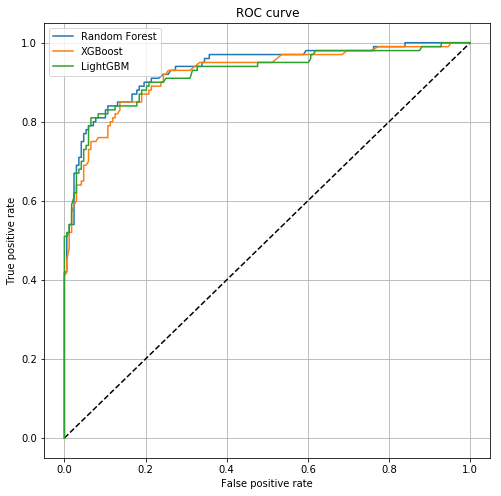

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, random_state=0)

# Random Forest ROC curve
y_dev_pred_rf = rf_model.predict_proba(X_dev)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_dev, y_dev_pred_rf)

# XGBoost ROC curve
y_dev_pred_xgb = xgb_model.predict_proba(X_dev)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_dev, y_dev_pred_xgb)

# LightGBM ROC curve
y_dev_pred_lgbm = lgbm_model.predict_proba(X_dev)[:, 1]
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_dev, y_dev_pred_lgbm)

# Calculate AUC values
aucs = []
aucs.append(('Random Forest', roc_auc_score(y_dev, y_dev_pred_rf)))
aucs.append(('XGBoost', roc_auc_score(y_dev, y_dev_pred_xgb)))
aucs.append(('LightGBM', roc_auc_score(y_dev, y_dev_pred_lgbm)))

# Display sorted AUC values
for i, (name, auc) in enumerate(sorted(aucs, key=lambda x: x[1], reverse=True)):
    print(f"{i+1} place, AUC of the {name} model: {auc:.3f}")
print()
    
# Plot the ROC cures
fig = plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot(fpr_lgbm, tpr_lgbm, label='LightGBM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

<a name="5"></a>
## 5. YOUR TURN

1. Experimenting with the data and hyperparameters of the models, try to get better accuracy, and notice the training time of both models.
2. Analyzing feature importance, try to make changes in the list of input features (i.e., `selected_features`).
3. Do not forget to submit your predictions for the [Titanic Kaggle Challenge](https://www.kaggle.com/c/titanic).

Recall the submission code (for the random forest model):

In [ ]:
# Make a prediction
# X_test = test[selected_features]
# y_test_pred = rf_model.predict(X_test)

# Create a submission file
# submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_test_pred})
# submission.to_csv('rf_submission.csv', index=False)
# submission.head()

In [ ]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from pandas.api.types import is_numeric_dtype, is_object_dtype
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [ ]:
def create_new_features(dt: pd.DataFrame) -> pd.DataFrame:

  data = dt.copy()
  
  data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')
  data['Title'] = data['Title'].replace(['Ms', 'Mlle'], 'Miss')
  data['Title'] = data['Title'].replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')
  data['Title'] = data['Title'].replace(['Dr', 'Major', 'Col', 'Sir'], 'Mr')
  data['Title'] = data['Title'].replace(['Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr')

  data["FamilySize"] = data["Parch"] + data["SibSp"]

  return data

In [ ]:
my_train = create_new_features(train)
my_test = create_new_features(test)

In [ ]:
def get_uniques_values_with_column(data:pd.DataFrame, column:str) -> list:
    if data[column].nunique() <= 10:
        return list(data[column].unique())
    return f"number uniques values = {data[column].nunique()}"

In [ ]:
cat_cols = list(my_train.select_dtypes(include='object').columns)
print(f"Categorical Features --> {len(cat_cols)} \n")
for col in cat_cols:
  print(f"{col} => {get_uniques_values_with_column(my_train, col)}")

Categorical Features --> 6 

Name => number uniques values = 891
Sex => ['male', 'female']
Ticket => number uniques values = 681
Cabin => number uniques values = 147
Embarked => ['S', 'C', 'Q', nan]
Title => ['Mr', 'Mrs', 'Miss', 'Master']


In [ ]:
num_cols = list(my_train.select_dtypes(exclude='object').columns)
print(f"Numerical Features --> {len(num_cols)} \n")

Numerical Features --> 8 



In [ ]:
def get_null_df(features:pd.DataFrame) -> pd.DataFrame:
    col_null_df = pd.DataFrame(columns = ['Feature', 'Type', 'Total NaN', 'Missing %'])
    col_null = features.columns[features.isna().any()].to_list()
    for col in col_null:
        dtype = "Numerical" if is_numeric_dtype(features[col]) else "Categorical"
        nulls = len(features[features[col].isna() == True][col])   
        col_null_df = col_null_df.append({'Feature': col, 
                                          'Type': dtype,
                                          'Total NaN': nulls,
                                          'Missing %': (nulls / len(features))*100
                                         }, ignore_index=True)
    return col_null_df

In [ ]:
get_null_df(my_train)

,Feature,Type,Total NaN,Missing %
0,Age,Numerical,177,19.865320
1,Cabin,Categorical,687,77.104377
2,Embarked,Categorical,2,0.224467


In [ ]:
selected_features = ["Sex", "Pclass", "SibSp", "Parch", "FamilySize", "Title", "Age", "Fare", "Embarked"]

best_cat_cols = [col for col in selected_features if col in cat_cols]
best_num_cols = [col for col in  selected_features if col in num_cols]

In [ ]:
assert len(best_cat_cols + best_num_cols) == len(selected_features)

In [ ]:
X = my_train.drop('Survived', axis=1)
y = my_train.Survived
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, stratify=y, shuffle=True, random_state=0)

In [ ]:
# # Preprocessing for numerical data
numerical_transformer =  Pipeline(steps=[
    ('norm', StandardScaler()),
    ('knn_imputer', KNNImputer(n_neighbors=4, weights='distance'))
    ])

In [ ]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('norm', StandardScaler(with_mean = False))
])

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, best_num_cols),
        ('cat', categorical_transformer, best_cat_cols)
    ])

In [ ]:
def grid_params_model(model, preprocessor, params, X_train, y_train, X_dev, y_dev):
  clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])
  print(clf.get_params().keys())
  grid_search = GridSearchCV(clf, params, cv=5)
  grid_search.fit(X_train, y_train)
  
  model_gs_best = grid_search.best_estimator_ 
  
  metrics_name = ['Mean cross-validated score', "accuracy_score train", "accuracy_score dev", "precision_score", "recall_score", "f1_score"]
  metrics_values = [grid_search.best_score_,
                    accuracy_score(y_train, model_gs_best.predict(X_train)),
                    accuracy_score(y_dev, model_gs_best.predict(X_dev)),
                    precision_score(y_dev, model_gs_best.predict(X_dev)),
                    recall_score(y_dev, model_gs_best.predict(X_dev)),
                    f1_score(y_dev, model_gs_best.predict(X_dev))]

  metrics_res = {k : v for k, v in zip(metrics_name, metrics_values)}
  
  return model_gs_best, metrics_res

In [ ]:
models_map = {"RandomForest": {'obj': RandomForestClassifier(random_state=42),
                               'params': {'model__n_estimators': [50, 100],
                                            'model__max_features': ['auto'],
                                            'model__max_depth': [4,5,6,7,8],
                                            'model__min_samples_split': [2, 4, 8, 16, 20],
                                            'model__min_samples_leaf': [1, 5, 10, 15],
                                            'model__criterion': ['gini', 'entropy']
                                           }
                               },
              
              "XGBoost":  {'obj': xgb.XGBClassifier(random_state=42),
                           'params': {'model__min_child_weight': [1, 5, 10],
                                      'model__gamma': [0.5, 1, 1.5, 2, 5],
                                      'model__subsample': [0.6, 0.8, 1.0],
                                      'model__colsample_bytree': [0.6, 0.8, 1.0],
                                      'model__max_depth': [3, 4, 5]
                                      }
                          },
              
              "LightGBM": {'obj': lgb.LGBMClassifier(random_state=42),
                           'params': {'model__n_estimators': [50, 100],
                                      'model__learning_rate': np.linspace(0.02, 0.16, 4),
                                      'model__num_leaves': [31],
                                      'model__min_data_in_leaf': [20, 30],
                                      'model__max_depth': range(3, 8)}
                          }   
             }

In [ ]:
from tqdm import tqdm

In [ ]:
result = {}

for name, value in tqdm(models_map.items()):
  model = value['obj']
  params = value['params']
  # print(model)
  log_model, log_model_info = grid_params_model(model, preprocessor, params, X_train, y_train, X_dev, y_dev)
  
  for k, v in log_model_info.items():
    print(k, v) 
  
  result[name] = {'obj': log_model,
                  'metrics': log_model_info}

  0%|          | 0/3 [00:00<?, ?it/s]

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__norm', 'preprocessor__num__knn_imputer', 'preprocessor__num__norm__copy', 'preprocessor__num__norm__with_mean', 'preprocessor__num__norm__with_std', 'preprocessor__num__knn_imputer__add_indicator', 'preprocessor__num__knn_imputer__copy', 'preprocessor__num__knn_imputer__metric', 'preprocessor__num__knn_imputer__missing_values', 'preprocessor__num__knn_imputer__n_neighbors', 'preprocessor__num__knn_imputer__weights', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__imputer', 'preprocessor__cat__onehot',

 33%|███▎      | 1/3 [06:50<13:40, 410.41s/it]

Mean cross-validated score 0.8298838709677419
accuracy_score train 0.8330658105939005
accuracy_score dev 0.8283582089552238
precision_score 0.8131868131868132
recall_score 0.7184466019417476
f1_score 0.7628865979381445
dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__norm', 'preprocessor__num__knn_imputer', 'preprocessor__num__norm__copy', 'preprocessor__num__norm__with_mean', 'preprocessor__num__norm__with_std', 'preprocessor__num__knn_imputer__add_indicator', 'preprocessor__num__knn_imputer__copy', 'preprocessor__num__knn_imputer__metric', 'preprocessor__num__knn_imputer__missing_values', 'preprocessor__n

 67%|██████▋   | 2/3 [10:47<05:08, 308.72s/it]

Mean cross-validated score 0.8427483870967742
accuracy_score train 0.8972712680577849
accuracy_score dev 0.8507462686567164
precision_score 0.8705882352941177
recall_score 0.7184466019417476
f1_score 0.7872340425531914
dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'model', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__norm', 'preprocessor__num__knn_imputer', 'preprocessor__num__norm__copy', 'preprocessor__num__norm__with_mean', 'preprocessor__num__norm__with_std', 'preprocessor__num__knn_imputer__add_indicator', 'preprocessor__num__knn_imputer__copy', 'preprocessor__num__knn_imputer__metric', 'preprocessor__num__knn_imputer__missing_values', 'preprocessor__n

100%|██████████| 3/3 [11:18<00:00, 226.09s/it]

Mean cross-validated score 0.8363225806451615
accuracy_score train 0.9085072231139647
accuracy_score dev 0.8171641791044776
precision_score 0.8
recall_score 0.6990291262135923
f1_score 0.7461139896373058


In [ ]:
name_model = list(result.keys())
scores = [v['metrics']['accuracy_score dev'] for v in result.values()]
scores

[0.8283582089552238, 0.8507462686567164, 0.8171641791044776]

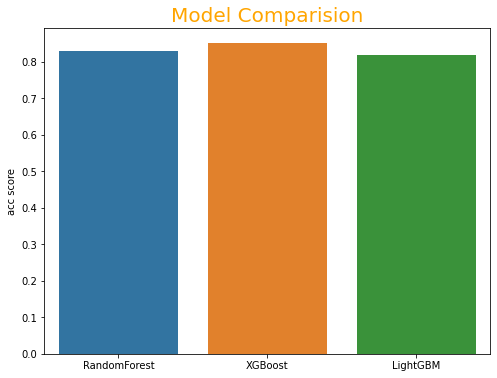

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(x=name_model, y=scores)
plt.ylabel('acc score')
plt.title('Model Comparision', color='orange', fontsize=20);

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
fpr_tpr__rocauc_array = []
for model_name, v in result.items():
  y_dev_pred_rf = v['obj'].predict_proba(X_dev)[:, 1]
  fpr_rf, tpr_rf, _ =  roc_curve(y_dev, y_dev_pred_rf)
  rocauc__score = roc_auc_score(y_dev, y_dev_pred_rf)
  fpr_tpr__rocauc_array.append([fpr_rf, tpr_rf, rocauc__score])

In [ ]:
list(result.keys())

['RandomForest', 'XGBoost', 'LightGBM']

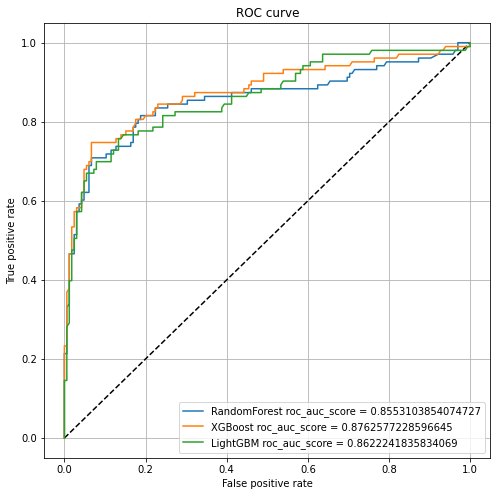

In [ ]:
# Plot the ROC cures
fig = plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], 'k--')

for name, value in zip(list(result.keys()), fpr_tpr__rocauc_array):
  plt.plot(value[0], value[1], label=f"{name} roc_auc_score = {value[2]}")

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
len(result['XGBoost']['obj']._final_estimator.feature_importances_)

15

In [ ]:
print("FEATURE IMPORTANCE:")

result['XGBoost']['obj']._final_estimator.feature_importances_



FEATURE IMPORTANCE:


array([0.09782398, 0.02131684, 0.02693703, 0.04219542, 0.01915294,
       0.02778414, 0.14470147, 0.2092552 , 0.10867543, 0.01778686,
       0.20849745, 0.01644061, 0.01926786, 0.01603124, 0.02413364],
      dtype=float32)

FEATURE IMPORTANCE:
x1_Mr: 0.182
x0_female: 0.178
x0_male: 0.123
Fare: 0.106
Pclass: 0.101
x1_Miss: 0.068
x1_Mrs: 0.053
Age: 0.052
FamilySize: 0.048
SibSp: 0.036
x1_Master: 0.020
Parch: 0.014
x2_C: 0.008
x2_S: 0.007
x2_Q: 0.004



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


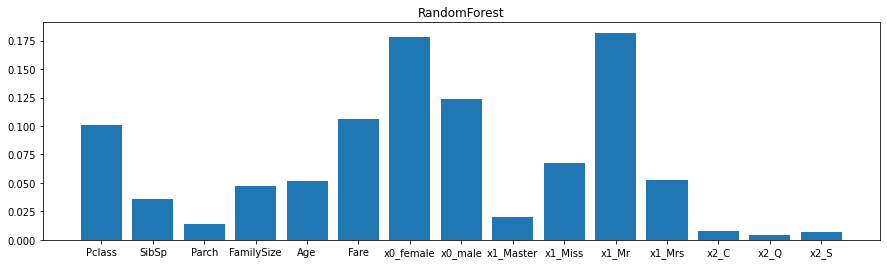

FEATURE IMPORTANCE:
x0_male: 0.209
x1_Mr: 0.208
x0_female: 0.145
x1_Master: 0.109
Pclass: 0.098
FamilySize: 0.042
Fare: 0.028
Parch: 0.027
x2_S: 0.024
SibSp: 0.021
x2_C: 0.019
Age: 0.019
x1_Miss: 0.018
x1_Mrs: 0.016
x2_Q: 0.016



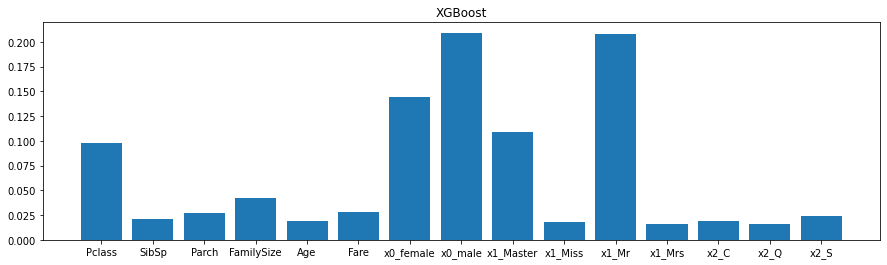

FEATURE IMPORTANCE:
Age: 0.376
Fare: 0.375
FamilySize: 0.041
Pclass: 0.039
x1_Mr: 0.033
SibSp: 0.031
x2_C: 0.021
Parch: 0.016
x0_female: 0.016
x2_S: 0.015
x1_Master: 0.013
x1_Miss: 0.013
x1_Mrs: 0.007
x0_male: 0.005
x2_Q: 0.000



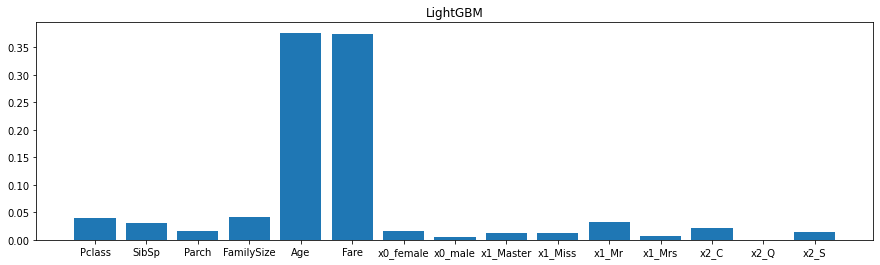

In [ ]:
# Display feature importance
preprocessor.fit(X_train)
feature_names = np.concatenate([best_num_cols, list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names())])
for name_model in result.keys():
  
  print("FEATURE IMPORTANCE:")

  feature_importances = result[name_model]['obj']._final_estimator.feature_importances_

  # Transform LightGBM's number of times the feature is used in a model into a weighting factor
  if max(feature_importances) > 1:
      feature_importances = feature_importances / sum(feature_importances)
  
  for name, value in sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True):
      print(f"{name}: {value:.3f}")
  print()

  # Plot feature importance
  fig = plt.figure(figsize=(15,4))
  plt.bar(range(len(feature_importances)), feature_importances, tick_label=feature_names)
  plt.title(name_model)
  plt.show()  

In [ ]:
for name, value in result.items():
  print(name, value['metrics']['accuracy_score dev'])

RandomForest 0.8283582089552238
XGBoost 0.8507462686567164
LightGBM 0.8171641791044776


In [ ]:
best_model = result['XGBoost']['obj']

In [ ]:
y_test_pred = best_model.predict(my_test)

In [ ]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_test_pred})
submission.to_csv('Xg_submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


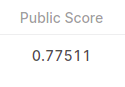

In [ ]:
xg_prob = result['XGBoost']['obj'].predict_proba(my_test)

In [ ]:
rf_prob = result['RandomForest']['obj'].predict_proba(my_test)
lg_prob = result['LightGBM']['obj'].predict_proba(my_test)

In [ ]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": ((xg_prob + rf_prob + lg_prob) / 3).argmax(1)})
submission.to_csv('X_submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


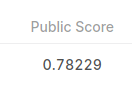